In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
mean = (0, 0)
cov = [[1, 0], [0, 1]]
n_samples = 10000
data = np.random.multivariate_normal(mean, cov, n_samples)

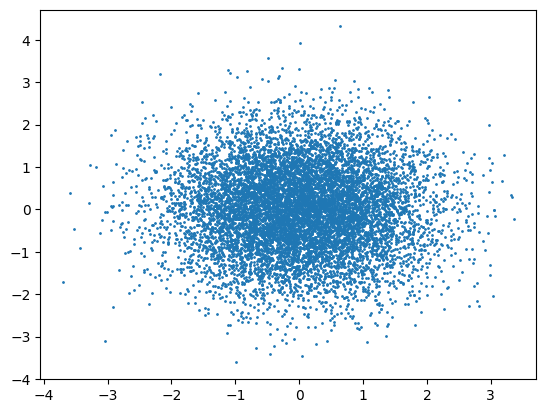

In [ ]:
plt.scatter(data[:, 0], data[:, 1], s=1)
plt.show()

In [ ]:
n_clusters = 3
iterations = 2600
norms_averages = []

In [49]:
for i in range(iterations):
    kmeans = KMeans(n_clusters=n_clusters, n_init=1, max_iter=300, random_state=i)
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    norms = np.linalg.norm(centroids, axis=1)
    norms_averages.append(np.mean(norms))

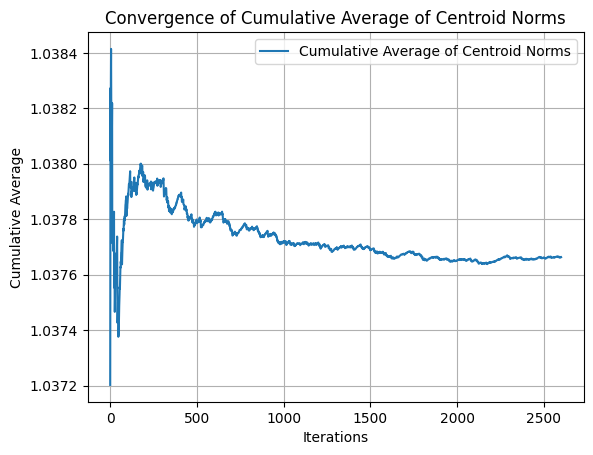

In [50]:
cumulative_averages = np.cumsum(norms_averages) / np.arange(1, iterations + 1)

plt.plot(cumulative_averages, label="Cumulative Average of Centroid Norms")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Average")
plt.title("Convergence of Cumulative Average of Centroid Norms")
plt.legend()
plt.grid()
plt.show()

In [51]:
tolerance = 1e-9
for i in range(1, len(cumulative_averages)):
    if np.abs(cumulative_averages[i] - cumulative_averages[i-1]) < tolerance:
        print(f"Convergence achieved with 9-digit accuracy at iteration {i + 1}")
        break
else:
    print("9-digit accuracy not achieved within the specified iterations.")

Convergence achieved with 9-digit accuracy at iteration 954
